<div align=center>

# Deep Learning Assignment

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Prerequisites


In [1]:
# DO NOT EDIT THIS CELL
# DO NOT IMPORT ANY OTHER ENTITIES INTO THE NOTEBOOK

import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy, binary_crossentropy, mean_squared_error
from keras.metrics import CategoricalAccuracy

### Loading the CIFAR-10 Dataset


In [114]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Data Preprocessing


In [115]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### Visualizing the Dataset


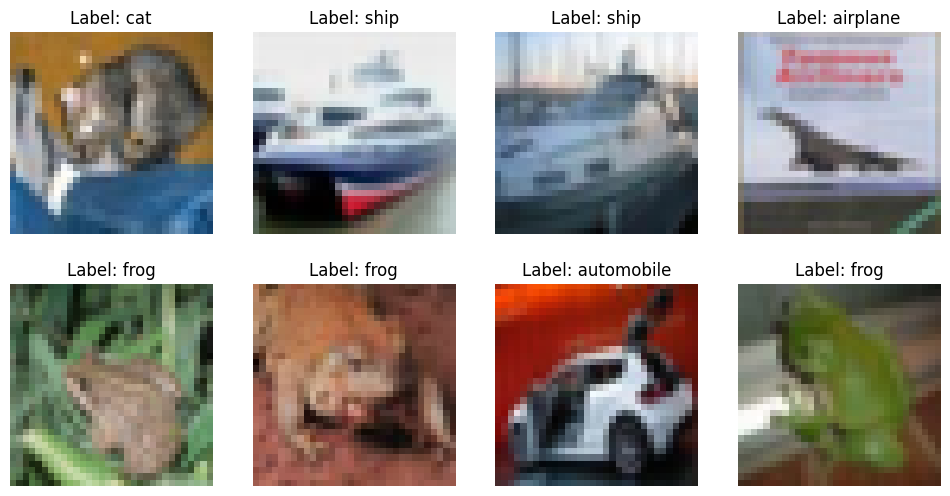

In [116]:
sample_images = X_test[:8, :, :, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :, :])
    plt.title(f"Label: {labels[sample_labels[i, :].argmax()]}")
    plt.axis("off")

plt.show()

### Building the DNN Model


In [ ]:
model = Sequential()

# ADD THE LAYERS
# AVAILABLE LAYERS: Input, Conv2D, MaxPooling2D, Flatten, Dense
# AVAILABLE ACTIVATION FUNCTIONS: Sigmoid, ReLU, Softmax

model.compile(
    loss=None, # SET THE LOSS FUNCTION (CCE, BCE, MSE)
    optimizer=None, # SET THE OPTIMIZER (Adam, SGD)
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=None, # SET THE NUMBER OF EPOCHS
    batch_size=None, # SET THE BATCH SIZE
    validation_data=(X_test, Y_test),
)

In [ ]:
Y_test_hat = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_test_hat.argmax(axis=1, keepdims=True),
    ),
    display_labels=labels,
).plot(xticks_rotation="vertical")